# Final Cleanup

In [47]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import random

In [48]:
# Adjust settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
%matplotlib inline

In [49]:
# Load preprocessed dataset

data_path = '../data/interim/'
df = pd.read_pickle(os.path.join(data_path, 'features.pkl'))

## Outlier identification

In [50]:
# Function to identify outliers for all continous variables
def find_outliers(df, col):
    q25 = df[col].quantile(0.25)
    q75 = df[col].quantile(0.75)
    iqr = q75 - q25
    ll = q25 - 1.5 * iqr
    ul = q75 + 1.5 * iqr

    ls = df.index[(df[col] < ll) | (df[col] > ul)]

    return ls

outlier_idx = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        outlier_idx.extend(find_outliers(df, col))

In [51]:
# Function to remove outliers from dataframe
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
    
df_cleaned = remove(df, outlier_idx)

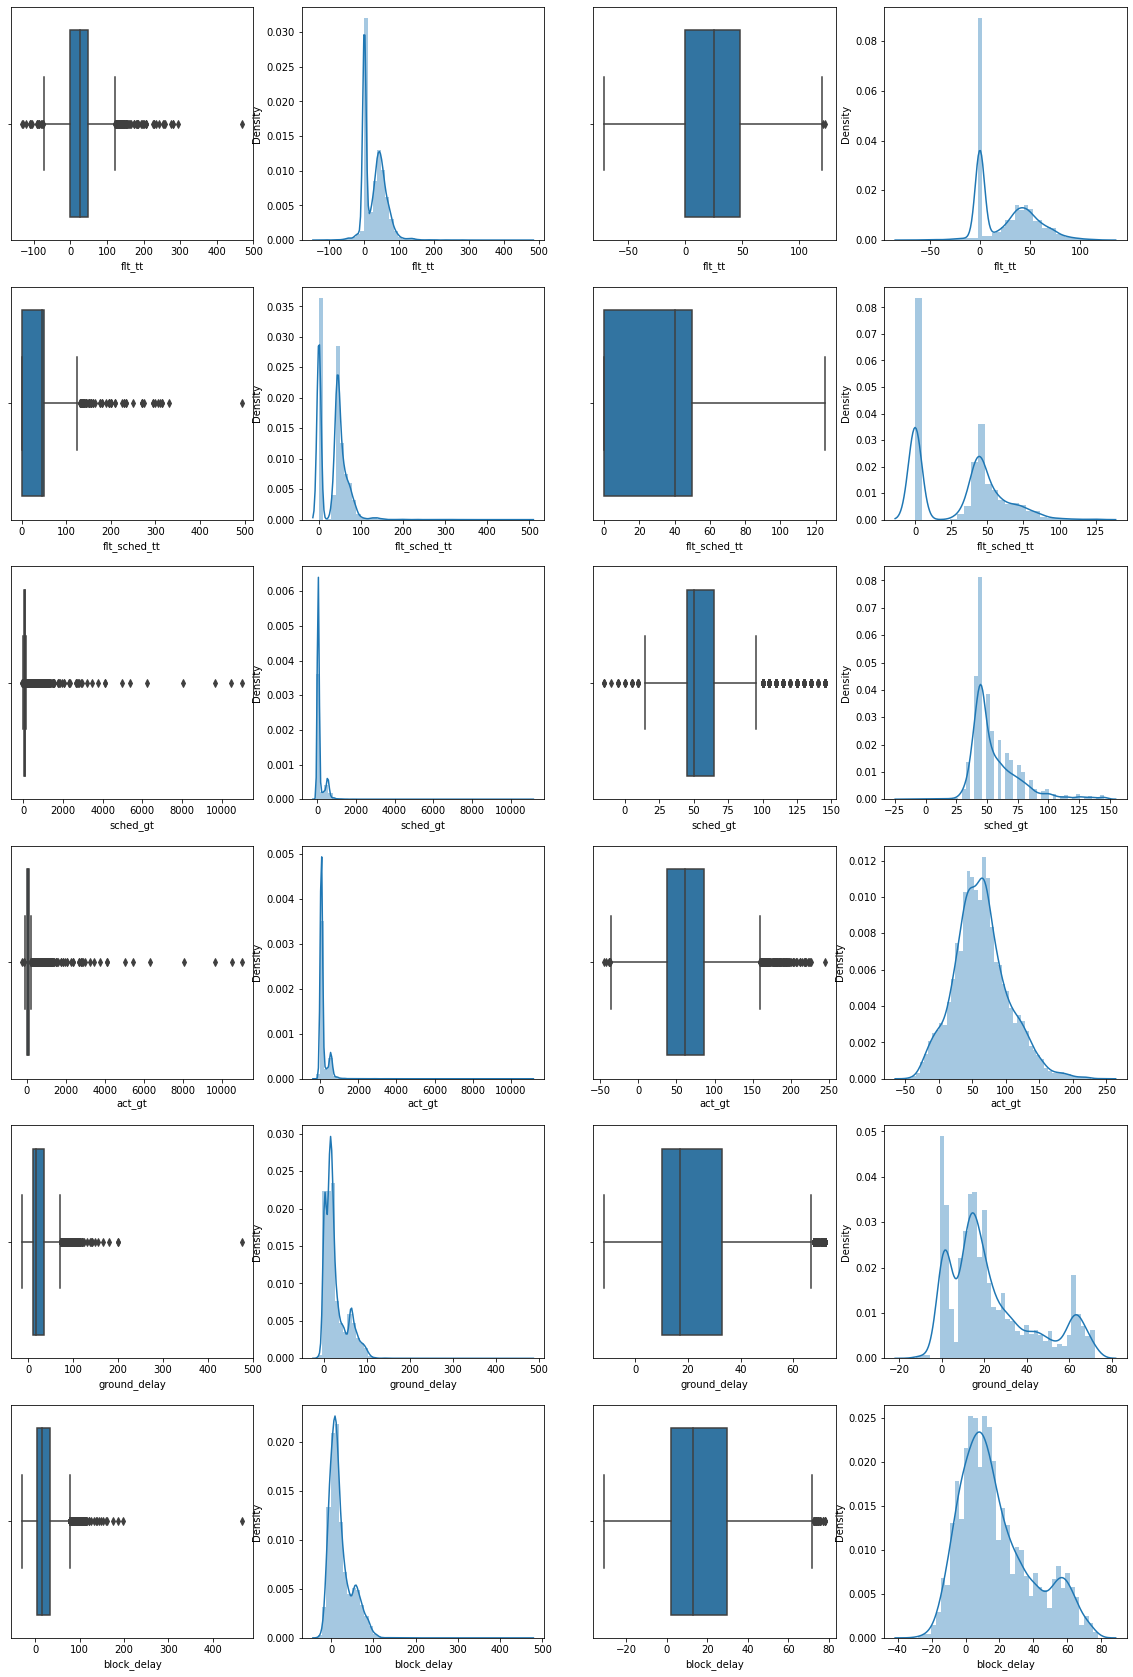

In [52]:
# Printing box- and distplots for cleaned and uncleaned data.

plt.figure(figsize=(20,30))

plt.subplot(6,4,1)
sns.boxplot(x=df['flt_tt'])
plt.subplot(6,4,2)
sns.distplot(df['flt_tt'])
plt.subplot(6,4,3)
sns.boxplot(x=df_cleaned['flt_tt'])
plt.subplot(6,4,4)
sns.distplot(df_cleaned['flt_tt'])

plt.subplot(6,4,5)
sns.boxplot(x=df['flt_sched_tt'])
plt.subplot(6,4,6)
sns.distplot(df['flt_sched_tt'])
plt.subplot(6,4,7)
sns.boxplot(x=df_cleaned['flt_sched_tt'])
plt.subplot(6,4,8)
sns.distplot(df_cleaned['flt_sched_tt'])

plt.subplot(6,4,9)
sns.boxplot(x=df['sched_gt'])
plt.subplot(6,4,10)
sns.distplot(df['sched_gt'])
plt.subplot(6,4,11)
sns.boxplot(x=df_cleaned['sched_gt'])
plt.subplot(6,4,12)
sns.distplot(df_cleaned['sched_gt'])

plt.subplot(6,4,13)
sns.boxplot(x=df['act_gt'])
plt.subplot(6,4,14)
sns.distplot(df['act_gt'])
plt.subplot(6,4,15)
sns.boxplot(x=df_cleaned['act_gt'])
plt.subplot(6,4,16)
sns.distplot(df_cleaned['act_gt'])

plt.subplot(6,4,17)
sns.boxplot(x=df['ground_delay'])
plt.subplot(6,4,18)
sns.distplot(df['ground_delay'])
plt.subplot(6,4,19)
sns.boxplot(x=df_cleaned['ground_delay'])
plt.subplot(6,4,20)
sns.distplot(df_cleaned['ground_delay'])

plt.subplot(6,4,21)
sns.boxplot(x=df['block_delay'])
plt.subplot(6,4,22)
sns.distplot(df['block_delay'])
plt.subplot(6,4,23)
sns.boxplot(x=df_cleaned['block_delay'])
plt.subplot(6,4,24)
sns.distplot(df_cleaned['block_delay'])

plt.show()

## Transition Time

In [53]:
# Describe flt_tt
df_cleaned['flt_tt'].describe()

count    8558.000000
mean       26.025123
std        28.135566
min       -71.000000
25%         0.000000
50%        25.000000
75%        48.000000
max       122.000000
Name: flt_tt, dtype: float64

## Scheduled Transition Time

In [54]:
# Describe flt_sched_tt
df_cleaned['flt_sched_tt'].describe()

count    8558.000000
mean       31.411545
std        28.228435
min         0.000000
25%         0.000000
50%        40.000000
75%        50.000000
max       125.000000
Name: flt_sched_tt, dtype: float64

## Scheduled Groundtime

In [55]:
# Describe sched_gt
df_cleaned['sched_gt'].describe()

count    8436.000000
mean       55.754505
std        19.903658
min       -15.000000
25%        45.000000
50%        50.000000
75%        65.000000
max       145.000000
Name: sched_gt, dtype: float64

In [56]:
# How many cases have a negative scheduled groundtime?
df_cleaned[(df_cleaned['sched_gt'] < 0)].shape

(8, 22)

In [57]:
# Delete cases with scheduled negative groundtime
df_cleaned = df_cleaned[(df_cleaned['sched_gt'] >= 0)]

## Actual Groundtime

In [58]:
# Describe act_gt
df_cleaned['act_gt'].describe()

count    8428.000000
mean       63.431182
std        40.394111
min       -45.000000
25%        37.000000
50%        61.000000
75%        86.000000
max       244.000000
Name: act_gt, dtype: float64

In [59]:
# How many cases have a negative actual groundtime?
df_cleaned[(df_cleaned['act_gt'] < 0)].shape

(453, 22)

In [60]:
# Delete cases with actual negative groundtime
df_cleaned = df_cleaned[(df_cleaned['act_gt'] >= 0)]

## Ground Delay

In [61]:
# Describe ground_delay
df_cleaned['ground_delay'].describe()

count    7975.000000
mean       20.902821
std        18.230939
min       -12.000000
25%         9.000000
50%        16.000000
75%        29.000000
max        72.000000
Name: ground_delay, dtype: float64

## Block Delay

In [62]:
# Describe block_delay
df_cleaned['block_delay'].describe()

count    7975.000000
mean       15.790219
std        19.441339
min       -31.000000
25%         2.000000
50%        12.000000
75%        26.000000
max        78.000000
Name: block_delay, dtype: float64

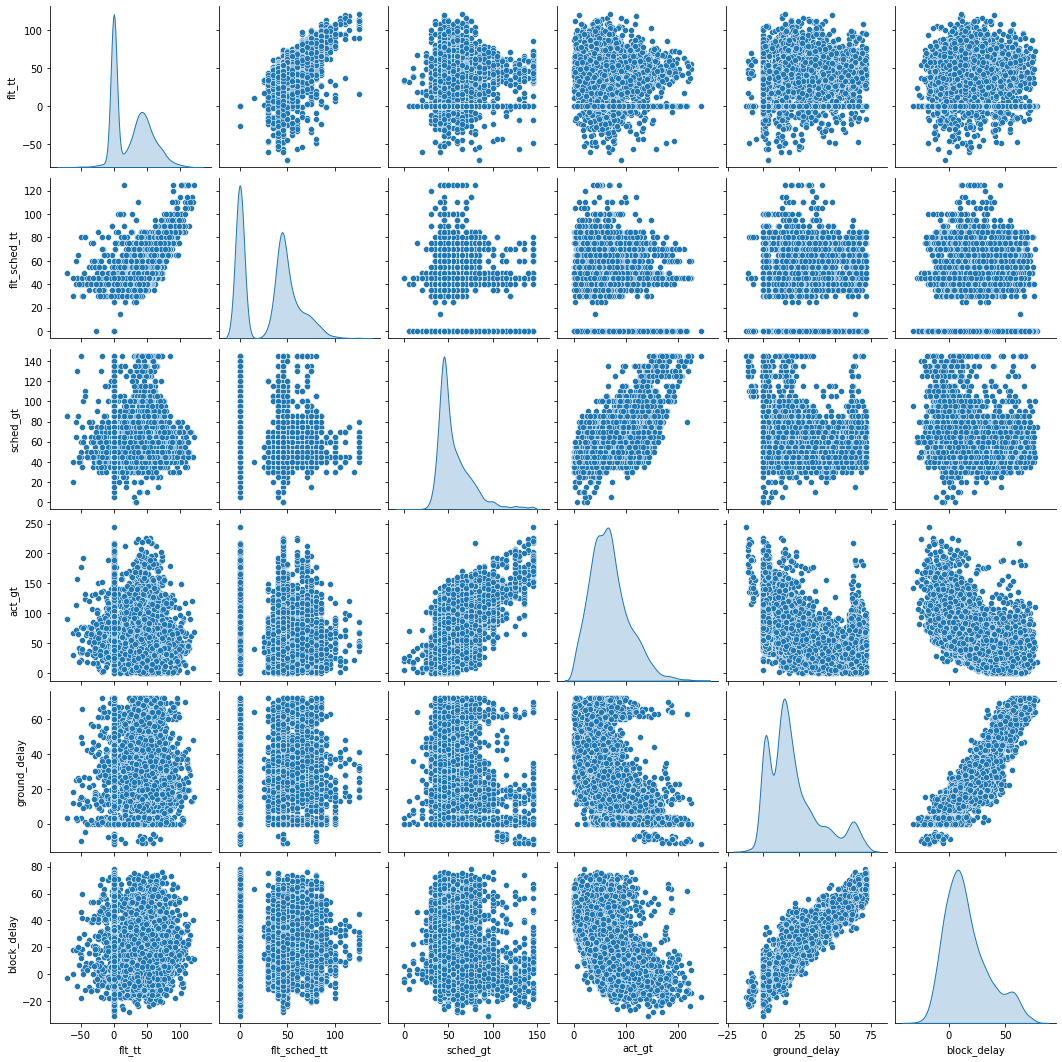

In [63]:
# Pairplot of all numerical values including dependent variable
data = df_cleaned[['flt_tt', 'flt_sched_tt', 'sched_gt', 'act_gt', 'ground_delay',  'block_delay']]
sns.pairplot(df_cleaned, vars=data, diag_kind='kde')

<AxesSubplot:>

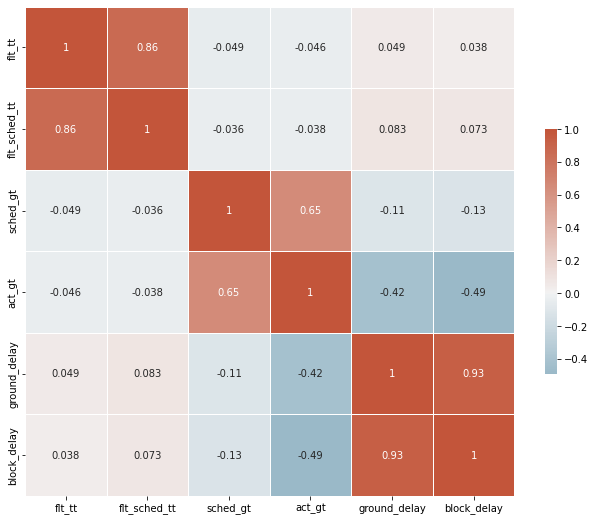

In [64]:
corr = data.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

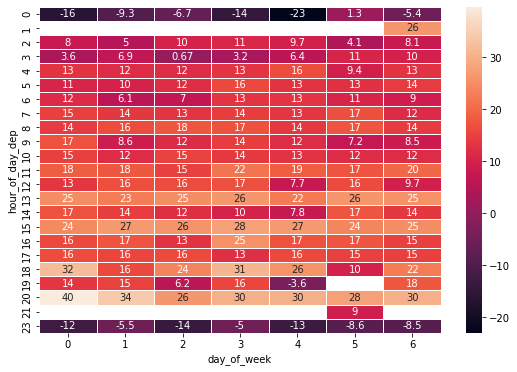

In [65]:
# Heatmap for day of week, hour of day and block_delay
data = df_cleaned.pivot_table(index='hour_of_day_dep', columns='day_of_week', values='block_delay', aggfunc=np.mean)
f, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(data, annot=True,linewidths=.5, ax=ax)

In [66]:
# Final check on NaN values
total = df_cleaned.isnull().sum().sort_values(ascending=False)
percent = (df_cleaned.isnull().sum()/df_cleaned.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(28)

,Total,Percent
flt_offblock,0,0.0
flt_onblock,0,0.0
cc_types,0,0.0
hour_of_day_arr,0,0.0
hour_of_day_dep,0,0.0
day_of_week,0,0.0
cc_count,0,0.0
cc_cp_ca,0,0.0
ca_count,0,0.0
cp_count,0,0.0


In [67]:
# Final view on dataframe
df_cleaned.head()

,flt_offblock,flt_onblock,flt_ac_reg,ground_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_sched_dep,flt_sched_arr,block_delay,routing,sched_gt,act_gt,cp_count,ca_count,cc_cp_ca,cc_count,day_of_week,hour_of_day_dep,hour_of_day_arr,cc_types,cc_roles
9,2019-06-01 03:50:00,2019-06-01 07:01:00,ECLBAX,25.0,320,0.0,0.0,2019-06-01 03:25:00,2019-06-01 06:45:00,16.0,New Jessica_East Carmen,95.0,94.0,2,4,none,0,5,3,6,0,[]
117,2019-06-01 08:35:00,2019-06-01 10:41:00,ECLBAX,15.0,320,60.0,60.0,2019-06-01 08:20:00,2019-06-01 10:35:00,6.0,East Carmen_South Nathaniel,75.0,120.0,2,4,both,6,5,8,10,3,"[cp, cp, ca, ca, ca, ca]"
194,2019-06-01 12:41:00,2019-06-01 14:52:00,ECLBAX,51.0,320,68.0,75.0,2019-06-01 11:50:00,2019-06-01 14:15:00,37.0,South Nathaniel_East Carmen,80.0,86.0,2,4,none,0,5,11,14,1,[]
268,2019-06-01 16:18:00,2019-06-01 17:32:00,ECLBAX,43.0,320,64.0,70.0,2019-06-01 15:35:00,2019-06-01 17:00:00,32.0,East Carmen_Joneshaven,50.0,32.0,2,4,both,6,5,15,17,3,"[cp, cp, ca, ca, ca, ca]"
416,2019-06-02 07:10:00,2019-06-02 08:32:00,ECLBAX,20.0,320,73.0,45.0,2019-06-02 06:50:00,2019-06-02 08:10:00,22.0,East Carmen_Joneshaven,45.0,38.0,2,4,none,0,6,6,8,0,[]


In [68]:
# Drop columns not needed for models
df_cleaned.drop(columns=['flt_offblock', 'flt_onblock', 'flt_sched_dep', 'flt_sched_arr', 'cc_roles'], inplace=True)

In [69]:
df_cleaned.to_csv('../data/processed/final.csv')
df_cleaned.to_pickle('../data/processed/final.pkl')